# Solid state matter as a set of quantum harmonic oscillators

Adrien Claret-Tournier

Here we explore how matter reacts at an atomic level to changes in temperature, and how each atom can be assimilated to a harmonic oscillator vibrating with potential energy proportional to the square root of the input temperature.

Add sections

In [2]:
%%capture
#### Import all necessary libraries, objects etc. ####
# plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# animation
from matplotlib import animation
from IPython.display import HTML
!conda install -y -q ffmpeg

# interaction
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# maths
import numpy as np
import random

# Suppress runtime warnings
import warnings
warnings.filterwarnings('ignore')

We will first consider a system of $N_{tot}$ quantum harmonic oscillators (QHO): for each single oscillator with energy $E_q$, we have an average energy $\langle E \rangle$, which can be rewritten in terms of the partition function $Z$:

$$
\langle E \rangle = \frac{1}{Z} \sum_{q=0}^{\infty} E_q e^{-\beta E_q} =-\frac{1}{Z}\frac{\partial Z}{\partial \beta} = -\frac{\partial lnZ}{\partial \beta}
$$

For a QHO, the energy of a quantum $q$ is $E_q = (\frac{1}{2} + q) \hbar \omega$ ; we can therefore find the partition function by approximating the upper limit of the sum with inifity, given a large number of microstates.

$$
Z = e^{-\frac{1}{2}\beta \hbar \omega} \sum_{q=0}^{\infty} e^{-\beta q \hbar \omega} = \frac{1}{2\sinh(\frac{1}{2} \beta \hbar \omega)}
$$

We can now find an expression for the average energy:

$$
\langle E \rangle = \frac{\hbar \omega}{2\tanh(\frac{1}{2} \beta \hbar \omega)}
$$

In [176]:
%%capture
# Init data for animation
Nf = 30 # no. frames
dt = 50 # frame time (ms)

T = np.linspace(0.01,2.5, 100)

# init average energy QHO
def E(x):
    return 0.5 / np.tanh(0.5/x)

# init polynomial
x = np.linspace(-1, 1,Nf)
def y(a):
    return a**2

# calculate average of polynomial
def avg(sc):
    avg = 0
    for i in x:
        avg += y(sc*x)
    avg = avg/len(x)
    return avg

# init temperatures and scaling factors for example energies
T1 = 0.000001                      # chosen arbitrarily
T2 = 0.5                      # ""
T3 = 1                        # ""
T4 = 2                        # ""

#sc1 = 0.4                     # ""
#sc2 = sc1 * np.sqrt(T2 / T1)  # Calculated to represent correct conversion between T and E
#sc3 = sc1 * np.sqrt(T3 / T1)  # ""
#sc4 = sc1 * np.sqrt(T4 / T1)  # ""

sc1 = sc4 * np.sqrt(T1 / T4)
sc2 = sc4 * np.sqrt(T2 / T4)
sc3 = sc4 * np.sqrt(T3 / T4)
sc4 = 0.9


# calculate position of ball depending on index i of animation (from 0 to Nf-1)     
def move(sc, i):
    # sorting out quadrants to map i between 0 and 199 to -1 and 1 (and back)
    if (i < (Nf/4-1)):
        px = sc * np.sin(np.pi/2 * (i / (Nf/4 - 1) - 1))
    if (Nf/4 < i < (Nf/2 - 1)):
        px = sc * np.sin(np.pi/2 * (i / (Nf/4) - 1) + np.pi/2)
    if (Nf/2 < i < (3*Nf/2 - 1)):
        px = sc * np.sin(np.pi/2 * ((i - Nf/2) / (Nf/4) + 1) + np.pi)
    else:
        px = sc * np.sin(np.pi/2 * (-(i - Nf/2) / (Nf/4) + 1) + np.pi)

    py = y(px) + 0.005 # y-coordinates
    
    pos = [-px,py] # direction correction
    Ux.clear()
    return pos


# Set up figure and plot
QHO = plt.figure(figsize=(12,6), constrained_layout=True)
grid = QHO.add_gridspec(1, 2) # create a grid to arrange subplots
Ux = QHO.add_subplot(grid[0,0]) # harmonic oscillator
avgE = QHO.add_subplot(grid[0,1]) # average energy plot

redLabel = "$T_1=$" + str.format('{0:0.1f}', T1)
greenLabel = "$T_2=$" + str.format('{0:0.1f}', T2)
blueLabel = "$T_3=$" + str.format('{0:0.1f}', T3)
yellowLabel = "$T_4=$" + str.format('{0:0.1f}', T4)

# Initialization function: plot the background of each frame
def init():
    Ux.clear()
    
    # Static graph: doesn't need to be called in animate()
    avgE.clear()
    avgE.set_xlim(0, 2.5)
    avgE.set_ylim(0, 2.6)
    avgE.set_xlabel('$k_B T/\hbar\omega$')
    avgE.set_ylabel('$E / \hbar \omega$')
    avgE.set_title('Average energy of the oscillator')
    avgE.plot(T,E(T), label = 'Quantum harmonic oscillator')
    avgE.plot(T, T,'--', label = 'Classical harmonic oscillator')
    
    avgE.plot(T1, E(T1), marker='o',color= 'r')
    avgE.plot(T2, E(T2), marker='o',color= 'g')
    avgE.plot(T3, E(T3), marker='o',color= 'b')
    avgE.plot(T4, E(T4), marker='o',color= 'y')
    avgE.legend()


# Animation function which updates figure data
def animate(i):
    # calculate ball positions
    pos1 = move(sc1, i)
    pos2 = move(sc2, i)
    pos3 = move(sc3, i)
    pos4 = move(sc4, i)
    
    Ux.set_ylim(0,1)
    Ux.tick_params(axis ='x', which ='both', length = 1)
    Ux.yaxis.set_major_formatter(plt.NullFormatter())
    Ux.set_xticks([0])
    
    # plot results
    Ux.set_xlabel("Position")
    Ux.set_ylabel("Potential energy")
    Ux.set_title('Quantum Harmonic oscillator\nat temperature T')
    Ux.plot(x, y(x))

    
    Ux.plot(0, 0.005,'r.', label = redLabel, markersize = 10)
    Ux.plot(pos2[0], pos2[1],'g.', label = blueLabel, markersize = 10)
    Ux.plot(pos3[0], pos3[1], 'b.', label = greenLabel, markersize = 10)
    Ux.plot(pos4[0], pos4[1], 'y.', label = yellowLabel, markersize = 10)
    Ux.legend()

Below is plotted the average energy per temperature (right), and we consider 3 specific points. These points will have a potential energy proportional to the square root of their temperature. The harmonic oscillators (left) represent this, where their amplitudes are each scaled to increase by factors of $ \sqrt{T} $. The horizontal lines on the QHO plot indicates the average energy of the oscillator.

In [177]:
# Call the animator
anim = animation.FuncAnimation(QHO, animate, init_func=init,frames=Nf, interval=dt)

# Call function to display the animation
HTML(anim.to_html5_video())

### Considering Heat Capacity

We can express the average energy within a solid as:

$$
\langle E \rangle = 3N \frac{\hbar \omega}{2\tanh(\frac{1}{2} \beta \hbar \omega)}
$$

And the heat capacity:
$$
C = \frac{d\langle E \rangle}{dt} = \frac{3N \hbar^2 \omega_E^2} {4k_B T^2 \sinh^2 (\frac{\hbar \omega_E}{k_B T})}
$$

Where the Einstein frequency is defined as $\omega_E = \omega$.

Here will be represented longitudinal and transverse virbations in a lattice of particles. The amplitude of the vibrations are proportional to the square root of the average energy, which is dependent on temperature.

In [246]:
# Define constants, data and functions relevant for both interaction and animation

# init data for plots
T = np.linspace(0.1,2.5, 100)
N = 1

# Heat capacity
def C(T):
    return 3 / (4 * T**2 * np.sinh(1/T)**2)

# vibration amplitude
def vibAmp(T):
    return np.sqrt(E(T))*0.02

The gradient of coloured balls on the right represents the increase in amplitude of the oscillations of the atom, with the largest ball being the amplitude of the atom at temperature $T_1$.

Below is animated the same principle, as an animated and saveable loop.

In [251]:
%%capture
# Init data for animation
Nf = 100 # no. frames
dt = 35 # frame time (ms)

# init plots
# Set up figure and plot
CvPlots = plt.figure(figsize=(12,6), constrained_layout=True)
grid = CvPlots.add_gridspec(1, 2) # create a grid to arrange subplots
Cv = CvPlots.add_subplot(grid[0,1]) # heat capacity
CvVib = CvPlots.add_subplot(grid[0,0]) # vibration

# init animation data
scmax = vibAmp(T[Nf - 1])
sineNf = np.linspace(-1,1, Nf)


n = 5

# create arrays for particle positions
xs = np.linspace(0.2, 0.8,n)
ys = np.linspace(0.2,0.8,n)
sine = np.linspace(0,8*2*np.pi, Nf) # particle oscillation positions

# generate n random phases between 0 and 2pi
def beats(n):
    out = np.zeros(n)
    for i in range(n):
        out[i] = random.randint(0,100)/100*2*np.pi
    
    return out

phases = beats(n*n)


def init():
    Cv.clear()
    CvVib.clear()

    
def animate(frame):
    Cv.clear()
    CvVib.clear()
    CvVib.set_xlim(0,1)
    CvVib.set_ylim(0,1)
    
    Cv.set_xlabel("$T/T_E$")
    Cv.set_ylabel("$C_v/Nk_B$")
    Cv.set_title("Heat capacity as a function of temperature")
    CvVib.set_title("Lattice oscillations")
    
    # calculate amplitude of oscillations and creates array
    sc = vibAmp(T[frame])

    # plot lattice
    i=0
    j=0
    phasesCount=0
    while i < n:
        j=0
        while j < n:
            
            xmove = sc * np.sin(sine[frame] + phases[phasesCount + j])
            ymove = sc * np.sin(sine[frame] + phases[n*n - (phasesCount + j + 1)])
            
            CvVib.plot(xs[i] + xmove, ys[j] + ymove, 'b.') # build lattice
            j+=1
        i+=1
        phasesCount += n

    
    
    # Cv plot with animated movement
    Cv.plot(T, C(T))
    Cv.plot(T[frame], C(T[frame]), marker='o', color='r')
    Cv.set_ylim(0,0.8)
    
    # CvVib plot for independent beats
    CvVib.tick_params(axis ='both', which ='both', length = 0)
    CvVib.yaxis.set_major_formatter(plt.NullFormatter())
    CvVib.xaxis.set_major_formatter(plt.NullFormatter())

In [252]:
# Call the animator
anim = animation.FuncAnimation(CvPlots, animate, init_func=init,frames=Nf, interval=dt)

# Call function to display the animation
HTML(anim.to_html5_video())

# Wave propagation: phonons and the heat capacity of solids

For a solid consisting of N oscillators that can each vibrate in 3D, we can  distinguish between two types of energy propagation: longitudinally and transverse. These two methods of propagation can be distinguished by how the energy they carry is transferred across an atomic lattice, or material. Looking at a 2D example, the animation below shows both types of propagation. This can be radily extended to 3D, where the lattice allows for 2 longitudinal waves and 1 transverse, for 3 degrees of freedom in the solid.

The three cases illustrated underneath for 1D propagation highlight the differences when the longitudinal and transverse wave velocities are allowed to be different.

In [35]:
%%capture
#### Transverse and Longitudinal vibrations ####

# init animation parameters
Nf = 75 # no. frames
dt = 45 # frame time (ms)

# Set up figure and plot
vibes = plt.figure(figsize=(12,8), constrained_layout=True)
grid = vibes.add_gridspec(1, 2) # create a grid to arrange subplots
long = vibes.add_subplot(grid[0,0], title = "Longitudinal wave") # Longitudinal perturbation
trans = vibes.add_subplot(grid[0,1], title = "Transverse wave") # Transverse perturbation
#oneDchain = vibes.add_subplot(grid[1,:], title = "longitudinal and transverse waves")

# init values for 2D wave propagation
nparticles = int(input("Please input the number of particles per side of the lattice (between 5-15) : "))
mode = int(input("Please input the oscillation mode (suggested between 1-7) : "))
if mode < 1:
    mode = 1
    print("Too low. Mode was set to 1.")
if mode > 7:
    print("Too high. Mode was set to 7.")

if nparticles < 5:
    nparticles = 5
    print("Too low. Number of particles was set to 5")
if nparticles > 15:
    nparticles = 15
    print("Too high. Number of particles was set to 15")


# init values for 2D wave propagation

animPortion = 8 - mode # what fraction of the total runtime will the wave be visible for

sc = 0.6/nparticles # amplitude of wave

sine = sc * np.sin(np.linspace(0,mode*np.pi, int((Nf)/animPortion))) # governs size of sine wave in lattice

# array to build total function that changes lattice shape (straight line - sine - straight line:  -~- )
linear = np.zeros(int(Nf * (animPortion-1)/animPortion))
endLinear = np.zeros(nparticles)
pert = np.append(linear, sine)
perturbation = np.append(pert, endLinear)

# create simple arrays
xsl = np.linspace(0, 1, nparticles)
ysl = np.ones(nparticles)
xst = np.linspace(0, 1, nparticles)
yst = np.ones(nparticles)


# init animation frame etc
def initVibes():
    long.clear()
    trans.clear()
    #oneDchain.clear()

# Animation function which updates data
def animateVibes(frame):
    long.clear()
    trans.clear()
    #oneDchain.clear()
       
    long.set_ylim(-0.1,1.1)
    trans.set_xlim(-0.1,1.1)
    #oneDchain.set_ylim(0.9,1.1)
    #oneDchain.set_xlim(-0.1,1.1)
    
    i=0
    j=0
    while j < nparticles: # builds vertical arrays
        while i < nparticles: # builds horizontal arrays
            ysl[nparticles - 1 - i] = 1 + perturbation[frame + i] #offsets ys by position on function given by frame number
            xst[nparticles - 1 - i] = xst[nparticles - 1 - i] + perturbation[frame + i]
            i += 1
        # offsets ys by rank of xs, building 2D lattice
        long.scatter(xsl, (ysl - xsl[j]), color = 'b')
        trans.scatter(xst, (yst - xsl[j]), color = 'b')
        j += 1
        #oneDchain.scatter(xst, ysl)

Please input the number of particles per side of the lattice (between 5-15) : 10
Please input the oscillation mode (suggested between 1-7) : 6


In [36]:
# Call the animator
anim = animation.FuncAnimation(vibes, animateVibes, init_func=initVibes,frames=Nf, interval=dt)

# Call function to display the animation
HTML(anim.to_html5_video())

The perturbations are represented with the wave equation
$$
\psi_j = \sum_j e^{(kj - \omega t)} ,
$$

with $k = n \frac{2\pi}{N} $ , $n = 1, 2,..., N$ is the oscillation mode.

By solving the coupled equation of motion for the atoms, we find the dispersion relation:

$$
\omega^2 = \frac{4k}{m}\sin^2(\frac{ka}{2}) ,
$$

with $ ka = \frac{2\pi}{\lambda} $.

Plotted below is the dispersion relation for arbitrary $\lambda$ and $a$ , the oscillation mode above highlighted in red, and the linear approximation for the dispersion relation, $\omega^2 \approx k^2 v_L^2$, 

with $v_L^2 = a^2 \frac{C_L}{m}$. 

In [17]:
#### plotting dispersion relation ####
lb = np.linspace(1,10,100)
C = 1
m = 1
a = 1
k = 2*np.pi/(lb*a)

@interact(a=(0.1,2,0.1))

def draw(a):
    
    w = np.sqrt(4 * C/m * np.sin(a * k/2)**2)
    wmode = np.sqrt(4 * C/m * np.sin(a * mode/2)**2)
    
    plt.figure(figsize=(14,7))
    plt.plot(k, w, label = "Dispersion relation")
    plt.plot(k, k*a*np.sqrt(C/m), label = "Linear approximation")
    plt.xlabel("$k$")
    plt.scatter(mode, wmode, color = 'red', label = "oscillation mode")
    plt.ylabel("$\omega$")
    plt.title("Dispersion relation")
    plt.legend();

interactive(children=(FloatSlider(value=1.0, description='a', max=2.0, min=0.1), Output()), _dom_classes=('wid…

We call these modes of collective lattice oscillations "phonons". Each phonon has its own wave number $k$ and for small $k$, $\omega = kv$ ($v$: speed of sound in material). Hence a density of states $\rho (k) \propto 4\pi k^2$ as a function of wave number translates to a density of states $g(\omega) \propto \omega^2$ as a function of frequency. The partition function for the entire system then obeys
$$
ln Z = \int_0^{\omega_D} g(\omega) ln Z^{(\omega)} d\omega,
$$
where $Z^{(\omega)}$ is the partition function of a single quantum harmonic oscillator with frequency $\omega$, and where $\omega_D$ is the Debye frequency, introduced to ensure that the integral over all modes $\int_0^{\omega_D} g(\omega) d\omega$ is equal to $3N$, the number of possible modes for $N$ particles vibrating in 3D.

This leads to the Debye representation for the heat capacity $C_v$:

$$
C_V = \frac{d\langle E \rangle}{dT} = \frac{3V \hbar^2}{8 \pi^2 v_s k_B T^2} \int_0^{\omega_D} \frac{\omega^4}{\sinh^4(\frac{1}{2}\beta \omega)} d\omega,
$$

with the low temperature limit

$$
C_V \approx \frac{12 \pi^4}{5} Nk_B { \left ( {\frac{T}{T_D}} \right ) }^3
$$

With $ T_D = \hbar \omega_D / k_B $.

As compared to the Einstein model:
$$ C_V = \frac{3 N k_B T_E^2}{4 T^2 \sinh^2 \left ( \frac{T_E}{2T} \right )} $$

Below we compare the Einstein and Debye heat capacity models at low temperatures.

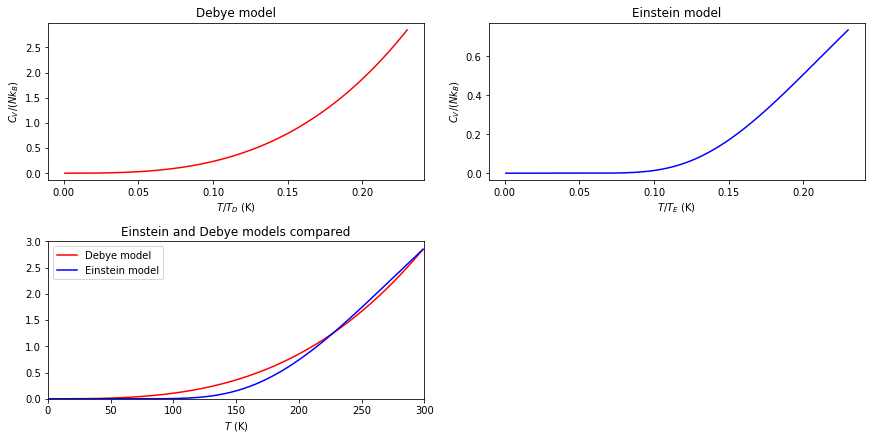

In [28]:
kb = 1.38e-23
hbar = 1.055e-34
N = 1

wd = 1.7e14
we = 1.7e14

Td = hbar*wd/kb
Te = hbar*we/kb

T = np.arange(1, 300, 1) # temperatures from 0K to around room temperature (after which sinh approx is invalid)

Cd = 12/5 * np.pi**4 * N*kb * (T/Td)**3 # Debye model
Ce = 3 * N*kb * (Te/T)**2 * np.exp(-Te/T) # Einstein model

ratio = Cd[len(Cd)-1] / Ce[len(Cd)-1] # scaling factor to plot both on same scale (due to differences in T_D and T_E)



# Set up figure and plot
Plots = plt.figure(figsize=(12,6), constrained_layout=True)
grid = Plots.add_gridspec(2, 2) # create a grid to arrange subplots
DMod = Plots.add_subplot(grid[0,0]) # heat capacity
EMod = Plots.add_subplot(grid[0,1]) # vibration
comp = Plots.add_subplot(grid[1,0]) # comparison


comp.set_xlim(0,300)
comp.set_ylim(0,3)
comp.set_xlabel("$T$ (K)")
comp.set_title("Einstein and Debye models compared")
comp.plot(T, Cd/(N*kb), color='r', label = "Debye model")
comp.plot(T, Ce/(N*kb)*ratio, color='b', label = "Einstein model")
comp.legend()

#Cd1 = 12/5 * np.pi**4 * N*kb * (T1/Td)**3


DMod.plot(T/Td, Cd/(N*kb), label = "$C_V$, Debye model", color = 'r')
DMod.set_title("Debye model")
DMod.set_xlabel("$T/T_D$ (K)")
DMod.set_ylabel("$C_V/(Nk_B)$")

EMod.plot(T/Te, Ce/(N*kb), label = "$C_V$, Einstein model", color = 'b')
EMod.set_title("Einstein model")
EMod.set_xlabel("$T/T_E$ (K)")
EMod.set_ylabel("$C_V/(Nk_B)$");